# Sports Anaytics Group Project
By: Daniel Leal, Hannah Santa Maria, Nathalie Quiroz and Jiatai Xie


In [1]:
# download packages needed
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('fivethirtyeight')

In [2]:
# read csv file
nba_20162020 = pd.read_csv("https://raw.githubusercontent.com/nquiroz2/sportsanalyticsgroupproject/main/NBA_2016-21_pergame.csv")
nba_20162020


,TEAM,Season,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Utah Jazz,2020-2021,42,31,11,0.738,48.1,116.8,41.2,88.0,...,36.9,47.8,23.7,14.3,6.5,5.5,4.1,18.9,19.8,8.3
1,Philadelphia 76ers,2020-2021,44,31,13,0.705,48.6,115.0,42.0,87.7,...,36.3,46.6,23.5,15.4,8.8,6.3,4.5,20.3,21.2,5.5
2,Phoenix Suns,2020-2021,42,29,13,0.690,48.5,114.0,42.9,87.5,...,35.1,43.3,27.4,13.3,6.6,4.3,3.8,19.8,17.9,6.7
3,Brooklyn Nets,2020-2021,44,30,14,0.682,48.6,120.1,43.7,87.4,...,35.2,43.9,26.7,14.0,6.6,5.3,4.4,19.0,18.8,5.0
4,Milwaukee Bucks,2020-2021,42,28,14,0.667,48.1,120.0,44.6,91.6,...,38.3,48.6,26.2,13.9,8.0,4.8,4.7,17.6,18.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Orlando Magic,2016-2017,82,29,53,0.354,48.3,101.1,38.3,87.0,...,33.3,43.2,22.2,13.3,7.1,4.8,5.1,19.3,18.7,-6.6
146,Philadelphia 76ers,2016-2017,82,28,54,0.341,48.4,102.4,37.7,85.3,...,33.0,42.8,23.8,16.7,8.4,5.1,5.4,21.9,19.6,-5.7
147,Los Angeles Lakers,2016-2017,82,26,56,0.317,48.1,104.6,39.3,87.4,...,32.1,43.5,20.9,15.2,8.2,3.9,5.4,20.7,18.5,-6.9
148,Phoenix Suns,2016-2017,82,24,58,0.293,48.4,107.7,39.9,88.5,...,33.1,45.0,19.6,15.4,8.2,4.9,5.3,24.8,22.2,-5.6


In [3]:
# pandas melt function
melt_df = pd.melt(nba_20162020, id_vars='TEAM')
# view melt_df
#melt_df
# check melt_df counts
melt_df['TEAM'].value_counts()

Boston Celtics            135
Philadelphia 76ers        135
Chicago Bulls             135
Charlotte Hornets         135
Memphis Grizzlies         135
Brooklyn Nets             135
Toronto Raptors           135
Oklahoma City Thunder     135
Minnesota Timberwolves    135
Milwaukee Bucks           135
San Antonio Spurs         135
Miami Heat                135
Sacramento Kings          135
Cleveland Cavaliers       135
LA Clippers               135
Los Angeles Lakers        135
Phoenix Suns              135
New Orleans Pelicans      135
Indiana Pacers            135
Orlando Magic             135
Denver Nuggets            135
Golden State Warriors     135
Washington Wizards        135
Dallas Mavericks          135
Atlanta Hawks             135
Detroit Pistons           135
Portland Trail Blazers    135
New York Knicks           135
Houston Rockets           135
Utah Jazz                 135
Name: TEAM, dtype: int64

In [4]:
nba_20162020.describe().round(3)

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,150.000,150.000,150.000,150.000,150.000,150.000,150.000,150.000,150.000,150.000,...,150.000,150.000,150.000,150.000,150.000,150.000,150.000,150.000,150.000,150.000
mean,71.853,35.927,35.927,0.499,48.314,109.351,40.327,87.564,46.059,11.292,...,34.242,44.257,23.907,14.179,7.647,4.853,4.861,20.199,20.196,-0.031
std,15.376,13.200,12.816,0.142,0.172,4.853,1.725,2.457,1.455,1.915,...,1.702,1.993,2.130,1.106,0.776,0.717,0.632,1.494,1.272,4.573
min,40.000,10.000,11.000,0.207,48.000,97.900,36.200,79.500,43.100,7.300,...,30.700,38.600,18.500,11.400,6.100,2.400,3.100,16.600,17.300,-9.600
25%,68.000,24.000,27.000,0.391,48.200,105.375,39.025,85.925,45.000,10.000,...,33.025,42.900,22.500,13.425,7.025,4.400,4.500,19.200,19.400,-2.975
50%,82.000,35.000,34.000,0.500,48.300,109.650,40.300,87.650,46.100,11.000,...,34.250,44.100,23.800,14.050,7.600,4.900,4.900,20.150,20.250,-0.050
75%,82.000,47.750,45.000,0.610,48.400,113.300,41.575,89.175,47.100,12.600,...,35.200,45.475,25.400,14.900,8.200,5.300,5.300,21.200,20.800,3.150
max,82.000,67.000,65.000,0.817,48.700,120.100,44.600,94.000,50.300,16.900,...,42.200,51.700,30.400,17.000,10.000,7.500,6.400,24.800,24.000,11.600


In [5]:
#calculate average 3PA for each season 
Avg3PA_PerSeason = nba_20162020.groupby('Season')['3PA'].mean().round(3)
Avg3PA_PerSeason

Season
2016-2017    27.003
2017-2018    28.997
2018-2019    32.007
2019-2020    34.103
2020-2021    34.763
Name: 3PA, dtype: float64

Text(0.5, 0, 'Season')

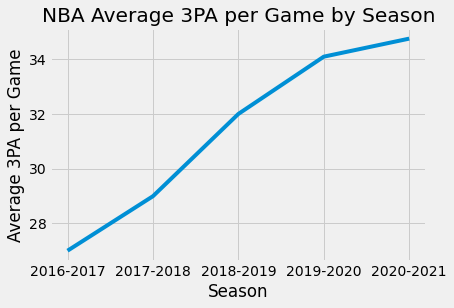

In [6]:
# Plot NBA Average 3PA per Game by Season
ax = (Avg3PA_PerSeason.plot(title='NBA Average 3PA per Game by Season'))
ax.set_ylabel('Average 3PA per Game')
ax.set_xlabel('Season')
#plt.xticks(rotation = 45)


In [13]:
# games won vs 3PA Graph


In [8]:
nba_20162020

,TEAM,Season,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Utah Jazz,2020-2021,42,31,11,0.738,48.1,116.8,41.2,88.0,...,36.9,47.8,23.7,14.3,6.5,5.5,4.1,18.9,19.8,8.3
1,Philadelphia 76ers,2020-2021,44,31,13,0.705,48.6,115.0,42.0,87.7,...,36.3,46.6,23.5,15.4,8.8,6.3,4.5,20.3,21.2,5.5
2,Phoenix Suns,2020-2021,42,29,13,0.690,48.5,114.0,42.9,87.5,...,35.1,43.3,27.4,13.3,6.6,4.3,3.8,19.8,17.9,6.7
3,Brooklyn Nets,2020-2021,44,30,14,0.682,48.6,120.1,43.7,87.4,...,35.2,43.9,26.7,14.0,6.6,5.3,4.4,19.0,18.8,5.0
4,Milwaukee Bucks,2020-2021,42,28,14,0.667,48.1,120.0,44.6,91.6,...,38.3,48.6,26.2,13.9,8.0,4.8,4.7,17.6,18.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Orlando Magic,2016-2017,82,29,53,0.354,48.3,101.1,38.3,87.0,...,33.3,43.2,22.2,13.3,7.1,4.8,5.1,19.3,18.7,-6.6
146,Philadelphia 76ers,2016-2017,82,28,54,0.341,48.4,102.4,37.7,85.3,...,33.0,42.8,23.8,16.7,8.4,5.1,5.4,21.9,19.6,-5.7
147,Los Angeles Lakers,2016-2017,82,26,56,0.317,48.1,104.6,39.3,87.4,...,32.1,43.5,20.9,15.2,8.2,3.9,5.4,20.7,18.5,-6.9
148,Phoenix Suns,2016-2017,82,24,58,0.293,48.4,107.7,39.9,88.5,...,33.1,45.0,19.6,15.4,8.2,4.9,5.3,24.8,22.2,-5.6


In [9]:
# query() method to filter 2020-2021 Season
season_2021 = nba_20162020.query("Season==2020-2021")
season_2021

,TEAM,Season,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-


In [11]:
# replace dashes with underscore
nba_20162020['Season'] = nba_20162020['Season'].str.replace('-','_')
nba_20162020


,TEAM,Season,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Utah Jazz,2020_2021,42,31,11,0.738,48.1,116.8,41.2,88.0,...,36.9,47.8,23.7,14.3,6.5,5.5,4.1,18.9,19.8,8.3
1,Philadelphia 76ers,2020_2021,44,31,13,0.705,48.6,115.0,42.0,87.7,...,36.3,46.6,23.5,15.4,8.8,6.3,4.5,20.3,21.2,5.5
2,Phoenix Suns,2020_2021,42,29,13,0.690,48.5,114.0,42.9,87.5,...,35.1,43.3,27.4,13.3,6.6,4.3,3.8,19.8,17.9,6.7
3,Brooklyn Nets,2020_2021,44,30,14,0.682,48.6,120.1,43.7,87.4,...,35.2,43.9,26.7,14.0,6.6,5.3,4.4,19.0,18.8,5.0
4,Milwaukee Bucks,2020_2021,42,28,14,0.667,48.1,120.0,44.6,91.6,...,38.3,48.6,26.2,13.9,8.0,4.8,4.7,17.6,18.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Orlando Magic,2016_2017,82,29,53,0.354,48.3,101.1,38.3,87.0,...,33.3,43.2,22.2,13.3,7.1,4.8,5.1,19.3,18.7,-6.6
146,Philadelphia 76ers,2016_2017,82,28,54,0.341,48.4,102.4,37.7,85.3,...,33.0,42.8,23.8,16.7,8.4,5.1,5.4,21.9,19.6,-5.7
147,Los Angeles Lakers,2016_2017,82,26,56,0.317,48.1,104.6,39.3,87.4,...,32.1,43.5,20.9,15.2,8.2,3.9,5.4,20.7,18.5,-6.9
148,Phoenix Suns,2016_2017,82,24,58,0.293,48.4,107.7,39.9,88.5,...,33.1,45.0,19.6,15.4,8.2,4.9,5.3,24.8,22.2,-5.6


In [12]:
# query() method to filter 2020-2021 Season
season_2021 = nba_20162020.query("Season==2020_2021")
season_2021

,TEAM,Season,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
